<a href="https://colab.research.google.com/github/daybreaksocialcircles/groupcluster/blob/master/Connect_Me_Match5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Find Social Circle Connections
# Enter your record number below to view matching connections

In [0]:
import pandas_profiling as pp
import numpy as np
import pandas as pd
import io
import requests
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.cluster import KMeans
import warnings
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Ignore Jupyter Notebook python warnings
warnings.simplefilter('ignore')


In [0]:
# Read .csv from URL
url="https://raw.githubusercontent.com/daybreaksocialcircles/groupcluster/master/social_circles.csv"
df=pd.read_csv(url)

In [0]:
def compare_matches(connection1, connection2):
    rank = 1000
    matching = pd.DataFrame(columns=['col_number', 'comment', 'interest', 'ranking'])
    print('Matching', sc_array[connection1][0], ' to ', sc_array[connection2][0])
    merged_list = [[sc_array[0][i], sc_array[connection1][i], sc_array[connection2][i]] for i in range(0, len(sc_array[0]))]
    for i in range(42, 58):
        if sc_array[connection1][i] == "-1" and sc_array[connection2][i] == "1":
            print('Mismatch WARNING: ', sc_array[connection1][0], ' Avoids', sc_array[0][i], ' and ', sc_array[connection2][0], 'likes',  sc_array[0][i])
        if sc_array[connection1][i] == "1" and sc_array[connection2][i] == "-1":
            print('Mismatch WARNING: ', sc_array[connection2][0], ' Avoids', sc_array[0][i], ' and ', sc_array[connection1][0], 'likes',  sc_array[0][i])
        # print(sc_array[0][i], sc_array[connection1][i], sc_array[connection2][i])
    for i in range(len(sc_array[0])):
        if sc_array[connection1][i] == sc_array[connection2][i] or ((sc_array[connection1][i] == '1' and sc_array[connection2][i] == '2') or (sc_array[connection1][i] == '2' and sc_array[connection2][i] == '1')):
            if sc_array[connection1][i] != '' and sc_array[connection1][i] != '0':
                # Display information for person being matched
                # print(i,sc_array[0][i],sc_array[connection2][i] )
                rank = 1000
                remark = 'none'
                # Interests
                if i in range(2, 39):
                    rank = 10
                    remark = 'Likes'
                    if sc_array[connection2][i] == '2':
                        rank = 1
                        remark = 'Really Likes!'
                # Enjoys / Avoids
                if i in range(42, 58):
                    if sc_array[connection2][i] != '0':
                        if sc_array[connection2][i] == '1':
                            rank = 20
                            remark = 'Enjoys'
                        else:
                            rank = 30
                            remark = 'Avoids'
                # Introverts
                if i in [40, 41]: 
                    rank = 90
                    remark = sc_array[connection2][i]
                # Wanting to make friends
                if i == 87:
                    rank = 200
                    matching.loc[200] = [200, 'Yes', 'Actively interested in making friends', 200]
                # Kids
                if i == 1: 
                    rank = 100
                    remark = sc_array[connection2][i]
                    if remark == 'Yes':
                        if sc_array[connection2][59] != '0':
                            matching.loc[101] = [101, sc_array[connection2][59], 'Number of daughters', 101]
                            matching.loc[102] = [102, sc_array[connection2][60], 'Youngest daughter born in', 102]
                            matching.loc[103] = [103, sc_array[connection2][61], 'Oldest daughter born in', 103]
                        if sc_array[connection2][62] != '0':
                            matching.loc[104] = [104, sc_array[connection2][62], 'Number of sons', 104]
                            matching.loc[105] = [105, sc_array[connection2][63], 'Youngest son born in', 105]
                            matching.loc[106] = [106, sc_array[connection2][64], 'Oldest son born in', 106]
                if rank not in [200, 1000]:
                    matching.loc[i] = [i, remark, sc_array[0][i], rank]
    output = matching.loc[:,['col_number', 'comment', 'interest', 'ranking']].sort_values(by=['ranking', 'col_number'])
    print(output.iloc[:, [2, 1]].to_string(index=False))
    print()


In [0]:

# Alternate Array formats for different analysis
url_source=requests.get(url).content 
hdf=pd.read_csv(io.StringIO(url_source.decode('utf-8')), header=None)
sc_array = np.array(hdf)

# Store the original column names in a python list
original_headers = list(df.columns.values)

# Remove all but the numeric columns
# Some analysis can only be performed on numeric data
ndf = df._get_numeric_data()

# Store the headers for all numeric columns in a list
numeric_headers = list(ndf.columns.values)

# Change NaN values to 0
NaNs_values = np.isnan(ndf)
ndf[NaNs_values] = 0
sc_matrix = pd.DataFrame.as_matrix(ndf)

# Create an array to store prediction values
predict_connection = np.zeros(len(sc_array),dtype=
                           [('record', int), ('interests', int), ('likes', int), ('daughters', int), ('sons', int)]
                          )

# Set the first column to the record number so that we can sort by predictions later and retain record number
for i in range(len(predict_connection)):
    predict_connection[i][0] = i+1

#Calculate values over just interests [ShortHikes...Anime]
predict_array = sc_matrix[0:,:38]
avoid_array = sc_matrix[0:,38:55]


In [0]:
def process_dropdown(connect_my_record):
    # Select a record with which to compare all other records for connections
    connection1 = connect_my_record - 1
    print('Original: ', sc_array[connect_my_record][0])
    for i in range(1,len(predict_array)):
        for j in range(len(predict_array[0])):
            predict_connection[i][1] += ( int(predict_array[i][j]) * int(predict_array[connection1][j]) ** 2 )
    for i in range(0,len(avoid_array)):
        for j in range(len(avoid_array[0])):
            if abs(int(avoid_array[i][j]) - int(avoid_array[connection1][j])) == 0:
                predict_connection[i][1] += 2
                #print(avoid_array[i][j], avoid_array[connection1][j], sc_array[connect_my_record][0], sc_array[i+1][0])
            if abs(int(avoid_array[i][j]) - int(avoid_array[connection1][j])) == 2:
                predict_connection[i][1] += -2
                #print('Mismatch', avoid_array[i][j], avoid_array[connection1][j], sc_array[connect_my_record][0], sc_array[i+1][0], j, sc_array[0][j+42])

    # Sort in descending order, highest matching score first
    predict_connection[::-1].sort(order='interests')

    print()
    predict_list=predict_connection[:5]['record'].tolist()
    for i in predict_list:
        print('Predictive Record Matched to: ',i)
        compare_matches(connect_my_record,i)

    return connect_my_record


In [0]:
# Select a record for analysis
# connect_my_record = 13

menui = df[['Surrogate_Key','Order']].values.tolist()
interact(process_dropdown, connect_my_record=menui);

interactive(children=(Dropdown(description='connect_my_record', options=(['1_Alabama_Alexander_City', 1], ['2_…

In [0]:
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'

# Some analysis can only be performed on numeric data
cdf=pd.read_csv(url)
cndf = cdf._get_numeric_data()
cndf = cndf.iloc[:,:72]

# Store the headers for all numeric columns in a list
cnumeric_headers = list(cndf.columns.values)

# Change NaN values to 0
NaNs_values = np.isnan(cndf)
cndf[NaNs_values] = 0

#Initialize our scaler
scaler = StandardScaler()
#Scale each column in numer
cndf = pd.DataFrame(scaler.fit_transform(cndf))
# cndf.iloc[:8,59:64]

csc_matrix = pd.DataFrame.as_matrix(cndf)

# Define Cluster Model
cluster_model = KMeans(n_clusters=5, random_state=20)

# Fit the model to Social Circles Matrix
cluster_model.fit(csc_matrix)

# Display the cluster labels assigned to each record (15 clusters created = 0-14)
cluster_model.labels_

cluster_labels = cluster_model.fit_predict(csc_matrix)

# Add cluster labels to end of data frame
# cp = connection Predictions Data Frame with firend_cluster column appended to the right of array
cp=cdf
cp['connection_cluster'] = cluster_labels

# Find clusters of connections for '1_Alabama_Alexander_City'
# connect_my_record = 25


def process_dropdown_kmean(connect_my_record):
    # Select a record with which to compare all other records for connections
    connection1 = connect_my_record - 1
    print('Original: ', sc_array[connect_my_record][0])

    match_me = cp[cp.Surrogate_Key==sc_array[connect_my_record, 0]]
    # Label for cluster
    match_cluster_label = match_me['connection_cluster'].iat[0]

    print('Matching Cluster: ', match_cluster_label)
    # Print all records with the name cluster label
    abc = cp[cp.connection_cluster==match_cluster_label]
    cluster_list = list(abc.index)

    # Print cluster matches
    for i in cluster_list:
        print('Cluster Record Matched to: ',i+1,'(Index =',i,')')
        compare_matches(connect_my_record, i+1)

    return connect_my_record

interact(process_dropdown_kmean, connect_my_record=menui);


interactive(children=(Dropdown(description='connect_my_record', options=(['1_Alabama_Alexander_City', 1], ['2_…

In [0]:
#  Validate results
#
# Compare Fashion_Conscious (column index=48)
# With "15_Alabama_Enterpise"
#   Matches with 11, 15, 37, 52, 72, 76, 79, 105
# print(cp.iloc[:16, [0,48]])
# print(cp.iloc[:, [0,48]].sort_values(by='Fashion_Conscious',ascending=False))

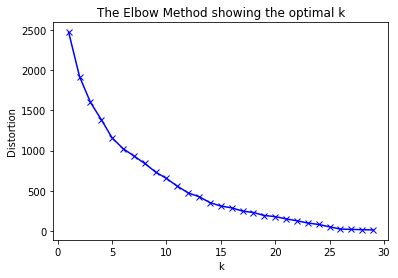

In [0]:
# Determine optimal values for K

# Meaningful clustering vs. groups are differentiated by less important factors

# https://www.udemy.com/clustering-classification-with-machine-learning-in-python/learn/lecture/9333372#overview
# Clustering & Classification With Machine Learning in Python

%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import seaborn as sns

# k means determine k
distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(sc_matrix)
    kmeanModel.fit(sc_matrix)
    distortions.append(sum(np.min(cdist(sc_matrix, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / sc_matrix.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [0]:
# Data Frame Groupings: Interests, Avoidances, Kids, Roles

interest_df = df.loc[:,['ShortHikes', 'LongHikes', 'Movies_TV', 'BookClub', 'GamesNight',
       'PokerNight', 'Films_Documentaries', 'CulturalEvents', 'PlayingSports',
       'WatchingSports', 'SnowSports', 'Running', 'ExerciseBudy', 'Biking',
       'Camping', 'Crafting', 'Geocaching', 'SinglesActivities',
       'Girls_GuysNightOut', 'KidsNightOut', 'SingleParents', 'FamilyFunNight',
       'IceCreamSocial', 'FoodieClub', 'WineAndCheese', 'PizzaNights',
       'SupperClub', 'ChocolateTasting', 'Karaoke', 'HolidayParties',
       'WaterFights', 'LAN_Gaming', 'CommunityService', 'Entrepreneurship',
       'RockHounding', 'MusicListening', 'JamSessions', 'Anime']]
avoid_df = df.loc[:, ['Restaurants', 'Bars', 'Libraries', 'Short_Walks', 'Smokers', 'Drinkers',
       'Fashion_Conscious', 'Religous_Discussions', 'Political_Discussions',
       'Liberal_Views', 'Conservative_Views', 'Thrifty_Activities',
       'Extravagant_Activities', 'Watching_Sports', 'Hanging_Out',
       'Big_Crowds', 'Loud_Crowds']]
kids_df = df.loc[:, ['Surrogate_Key','Num_Daughters', 'Min_Daugthers', 'Max_Daughters', 'Num_Sons', 'Min_Sons', 'Max_Sons']]
roles_df = df.loc[:, ['Officer', 'Facebook', 'PlanEvent', 'ConnectPeople',
       'TechnicalHelp', 'Club_Board', 'Actively_making_friends',
       'Helping_others_connect']]
# kids_df[:10]

In [0]:

def compare_matches_kids(connection1, connection2):
    rank = 1000
    matching = pd.DataFrame(columns=['col_number', 'comment', 'interest', 'ranking'])
    print('Matching', sc_array[connection1][0], ' to ', sc_array[connection2][0])
    merged_list = [[sc_array[0][i], sc_array[connection1][i], sc_array[connection2][i]] for i in range(0, len(sc_array[0]))]
    for i in range(42, 58):
        if sc_array[connection1][i] == "-1" and sc_array[connection2][i] == "1":
            print('Mismatch WARNING: ', sc_array[connection1][0], ' Avoids', sc_array[0][i], ' and ', sc_array[connection2][0], 'likes',  sc_array[0][i])
        if sc_array[connection1][i] == "1" and sc_array[connection2][i] == "-1":
            print('Mismatch WARNING: ', sc_array[connection2][0], ' Avoids', sc_array[0][i], ' and ', sc_array[connection1][0], 'likes',  sc_array[0][i])
        # print(sc_array[0][i], sc_array[connection1][i], sc_array[connection2][i])
    for i in range(len(sc_array[0])):
        if sc_array[connection1][i] == sc_array[connection2][i] or ((sc_array[connection1][i] == '1' and sc_array[connection2][i] == '2') or (sc_array[connection1][i] == '2' and sc_array[connection2][i] == '1')):
            if sc_array[connection1][i] != '' and sc_array[connection1][i] != '0':
                # Display information for person being matched
                # print(i,sc_array[0][i],sc_array[connection2][i] )
                rank = 1000
                remark = 'none'
                # Interests
                if i in range(2, 39):
                    rank = 10
                    remark = 'Likes'
                    if sc_array[connection2][i] == '2':
                        rank = 1
                        remark = 'Really Likes!'
                # Enjoys / Avoids
                if i in range(42, 58):
                    if sc_array[connection2][i] != '0':
                        if sc_array[connection2][i] == '1':
                            rank = 20
                            remark = 'Enjoys'
                        else:
                            rank = 30
                            remark = 'Avoids'
                # Introverts
                if i in [40, 41]: 
                    rank = 90
                    remark = sc_array[connection2][i]
                # Wanting to make friends
                if i == 87:
                    rank = 200
                    matching.loc[200] = [200, 'Yes', 'Actively interested in making friends', 200]
                # Kids
                if i == 1: 
                    rank = 100
                    remark = sc_array[connection2][i]
                    if remark == 'Yes':
                        if sc_array[connection2][59] != '0':
                            matching.loc[101] = [101, sc_array[connection2][59], 'Number of daughters', 101]
                            matching.loc[102] = [102, sc_array[connection2][60], 'Youngest daughter born in', 102]
                            matching.loc[103] = [103, sc_array[connection2][61], 'Oldest daughter born in', 103]
                        if sc_array[connection2][62] != '0':
                            matching.loc[104] = [104, sc_array[connection2][62], 'Number of sons', 104]
                            matching.loc[105] = [105, sc_array[connection2][63], 'Youngest son born in', 105]
                            matching.loc[106] = [106, sc_array[connection2][64], 'Oldest son born in', 106]
                if rank not in [200, 1000]:
                    matching.loc[i] = [i, remark, sc_array[0][i], rank]
    output = matching.loc[:,['col_number', 'comment', 'interest', 'ranking']].sort_values(by=['ranking', 'col_number'])
    print(output.iloc[:, [2, 1]].to_string(index=False))
    print()


# Select a record with which to compare all other records for connections
connection1 = 25 - 1

# Create an array to store prediction values
predict_connection = np.zeros(len(sc_array),dtype=
                           [('record', int), ('interests', int), ('likes', int), ('girls', int), ('boys', int)]
                          )

# Set the first column to the record number so that we can sort by predictions later and retain record number
for i in range(len(predict_connection)):
    predict_connection[i][0] = i+1

   
#Calculate values over just interests [ShortHikes...Anime]
predict_array = sc_matrix[0:,:38]
avoid_array = sc_matrix[0:,38:55]

connect_my_record = 17 - 1
# Indexes of sample records
    # 25 = 6 older kids
    # 22 = 4 kids
    # 31 = Steven and Anna
    # 29 = 3 boys
    # 105 = 1 boy
    # 18 = 3 girls
    # 43 = 1 girl
    # 3 = no kids
    
kids_df = df.loc[:, ['Surrogate_Key','Num_Daughters', 'Min_Daugthers', 'Max_Daughters', 'Num_Sons', 'Min_Sons', 'Max_Sons']]
#print(kids_df)
for i in range(len(predict_connection)):
    predict_connection[i][3] = 1000
    
print('Original: ', kids_df.loc[connect_my_record][0])
print(int(kids_df.loc[connect_my_record]['Num_Daughters']),int(kids_df.loc[connect_my_record]['Min_Daugthers']),int(kids_df.loc[connect_my_record]['Max_Daughters']))
print(int(kids_df.loc[connect_my_record]['Num_Sons']),int(kids_df.loc[connect_my_record]['Min_Sons']),int(kids_df.loc[connect_my_record]['Max_Sons']))
print()

orig_kid_count = int(kids_df.loc[connect_my_record]['Num_Daughters']) + int(kids_df.loc[connect_my_record]['Num_Sons'])
if orig_kid_count == 0:
    print('Original has no Kids')
else:
    for i in range(1,len(kids_df)):
        i_kid_count = int(kids_df.loc[i]['Num_Daughters']) + int(kids_df.loc[i]['Num_Sons'])
        # Does the connection have no kids?
        if i_kid_count != 0:
            predict_connection[i][3] = 0
            predict_connection[i][3] += abs(orig_kid_count - i_kid_count)
    
            predict_connection[i][3] += abs(int(kids_df.loc[i]['Num_Daughters']) - int(kids_df.loc[connect_my_record]['Num_Daughters']))
            # The match has daughters
            if int(kids_df.loc[i]['Num_Daughters']) != 0:
                if int(kids_df.loc[connect_my_record]['Num_Daughters']) == 0:
                    # The original did not have daughters
                    predict_connection[i][3] += 40
                    predict_connection[i][3] += abs(int(kids_df.loc[i]['Min_Daugthers']) - int(kids_df.loc[connect_my_record]['Min_Sons'])) ** 2
                    predict_connection[i][3] += abs(int(kids_df.loc[i]['Max_Daughters']) - int(kids_df.loc[connect_my_record]['Max_Sons'])) ** 2
                else:
                    # Exponentially add the differences in ages
                    predict_connection[i][3] += abs(int(kids_df.loc[i]['Min_Daugthers']) - int(kids_df.loc[connect_my_record]['Min_Daugthers'])) ** 2
                    predict_connection[i][3] += abs(int(kids_df.loc[i]['Max_Daughters']) - int(kids_df.loc[connect_my_record]['Max_Daughters'])) ** 2
            else: 
                # The match does not have daughters
                if int(kids_df.loc[connect_my_record]['Num_Daughters']) != 0:
                    # Would be better if they had daughters
                    predict_connection[i][3] += 20
                else:
                    # Neither have daughters
                    predict_connection[i][3] += 0
                    
            predict_connection[i][3] += abs(int(kids_df.loc[i]['Num_Sons']) - int(kids_df.loc[connect_my_record]['Num_Sons']))
            if int(kids_df.loc[i]['Num_Sons']) != 0:
                if int(kids_df.loc[connect_my_record]['Num_Sons']) == 0:
                    predict_connection[i][3] += 40
                    predict_connection[i][3] += abs(int(kids_df.loc[i]['Min_Sons']) - int(kids_df.loc[connect_my_record]['Min_Daughters'])) ** 2
                    predict_connection[i][3] += abs(int(kids_df.loc[i]['Max_Sons']) - int(kids_df.loc[connect_my_record]['Max_Daughters'])) ** 2
                else:
                    predict_connection[i][3] += abs(int(kids_df.loc[i]['Min_Sons']) - int(kids_df.loc[connect_my_record]['Min_Sons'])) ** 2
                    predict_connection[i][3] += abs(int(kids_df.loc[i]['Max_Sons']) - int(kids_df.loc[connect_my_record]['Max_Sons'])) ** 2
            else:
                if int(kids_df.loc[connect_my_record]['Num_Sons']) != 0:
                        predict_connection[i][3] += 20
                else:
                    # Neither have sons
                    predict_connection[i][3] += 0        #print(int(kids_df.loc[i]['Num_Daughters']),int(kids_df.loc[i]['Min_Daugthers']),int(kids_df.loc[i]['Max_Daughters']))
        #print(int(kids_df.loc[i]['Num_Sons']),int(kids_df.loc[i]['Min_Sons']),int(kids_df.loc[i]['Max_Sons']))
        #print(predict_connection[i][3])
        #print()
# Sort in descending order, highest matching score first
predict_connection[::1]

print()
kid_predict_df = pd.DataFrame(columns=['Surrogate_Key','Num_Daughters', 'Min_Daugthers', 'Max_Daughters', 'Num_Sons', 'Min_Sons', 'Max_Sons'])
predict_list=predict_connection[:20]['record'].tolist()
j = 0
for i in predict_list:
    # print(df.loc[i-1, ['Surrogate_Key','Num_Daughters', 'Min_Daugthers', 'Max_Daughters', 'Num_Sons', 'Min_Sons', 'Max_Sons']])
    j += 1
    kid_predict_df.loc[j, ['Surrogate_Key','Num_Daughters', 'Min_Daugthers', 'Max_Daughters', 'Num_Sons', 'Min_Sons', 'Max_Sons']] = df.loc[i-1, ['Surrogate_Key','Num_Daughters', 'Min_Daugthers', 'Max_Daughters', 'Num_Sons', 'Min_Sons', 'Max_Sons']]
    
predict_list=predict_connection[:20]['record'].tolist()
for i in predict_list:
    print('Predictive Record Matched to: ',i)
    compare_matches_kids(connect_my_record+1,i)



Original:  17_Alabama_Florence
1 2004 2004
2 2002 2013


Predictive Record Matched to:  1
Matching 17_Alabama_Florence  to  1_Alabama_Alexander_City
          interest comment
    CulturalEvents   Likes
      ExerciseBudy   Likes
        FoodieClub   Likes
       WaterFights   Likes
  CommunityService   Likes
       Short_Walks  Enjoys
         Libraries  Avoids
 Fashion_Conscious  Avoids
        Big_Crowds  Avoids
              Kids       1

Predictive Record Matched to:  2
Matching 17_Alabama_Florence  to  2_Alabama_Andalusia
               interest comment
              Movies_TV   Likes
               BookClub   Likes
           ExerciseBudy   Likes
                Camping   Likes
            WaterFights   Likes
       CommunityService   Likes
         MusicListening   Likes
            Restaurants  Enjoys
            Short_Walks  Enjoys
     Conservative_Views  Enjoys
     Thrifty_Activities  Enjoys
 Extravagant_Activities  Enjoys
        Watching_Sports  Enjoys
            Hangin

              interest comment
            GamesNight   Likes
   Films_Documentaries   Likes
         PlayingSports   Likes
          KidsNightOut   Likes
      CommunityService   Likes
           Restaurants  Enjoys
           Short_Walks  Enjoys
 Political_Discussions  Enjoys
    Thrifty_Activities  Enjoys
       Watching_Sports  Enjoys
           Hanging_Out  Enjoys
             Extrovert     0.5
                  Kids       1

Predictive Record Matched to:  19
Matching 17_Alabama_Florence  to  19_Alabama_Gadsden
            interest comment
            BookClub   Likes
 Films_Documentaries   Likes
         Restaurants  Enjoys
   Fashion_Conscious  Avoids
          Big_Crowds  Avoids

Predictive Record Matched to:  20
Matching 17_Alabama_Florence  to  20_Alabama_Greenville
            interest comment
          ShortHikes   Likes
          GamesNight   Likes
 Films_Documentaries   Likes
      CulturalEvents   Likes
      IceCreamSocial   Likes
             Karaoke   Likes
          

In [0]:
print('Matching Daughters sorted')
kid_predict_df.sort_values(by=['Num_Daughters','Min_Daugthers','Max_Daughters'],ascending=False)

Matching Daughters sorted


,Surrogate_Key,Num_Daughters,Min_Daugthers,Max_Daughters,Num_Sons,Min_Sons,Max_Sons
18,18_Alabama_Fort_Payne,3,2001,2011,0,0,0
20,20_Alabama_Greenville,2,2012,2015,0,0,0
4,4_Alabama_Athens,2,2004,2007,1,2001,2001
10,10_Alabama_Clanton,2,2001,2010,2,2001,2010
9,9_Alabama_Chickasaw,1,2017,2017,1,2015,2015
15,15_Alabama_Enterprise,1,2017,2017,1,2015,2015
2,2_Alabama_Andalusia,1,2010,2010,0,0,0
8,8_Alabama_Birmingham,1,2008,2008,0,0,0
17,17_Alabama_Florence,1,2004,2004,2,2002,2013
19,19_Alabama_Gadsden,1,1990,1990,1,1984,1984


In [0]:
print('Matching Sons sorted')
kid_predict_df.sort_values(by=['Num_Sons','Min_Sons','Max_Sons'],ascending=False)

Matching Sons sorted


,Surrogate_Key,Num_Daughters,Min_Daugthers,Max_Daughters,Num_Sons,Min_Sons,Max_Sons
16,16_Alabama_Eufaula,0,0,0,3,2005,2011
1,1_Alabama_Alexander_City,0,0,0,2,2005,2010
17,17_Alabama_Florence,1,2004,2004,2,2002,2013
10,10_Alabama_Clanton,2,2001,2010,2,2001,2010
5,5_Alabama_Atmore,0,0,0,2,2000,2008
13,13_Alabama_Demopolis,0,0,0,1,2016,2016
9,9_Alabama_Chickasaw,1,2017,2017,1,2015,2015
11,11_Alabama_Cullman,0,0,0,1,2015,2015
15,15_Alabama_Enterprise,1,2017,2017,1,2015,2015
4,4_Alabama_Athens,2,2004,2007,1,2001,2001


In [0]:

def process_dropdown_kids(connect_my_record):
    # Select a record with which to compare all other records for connections
    connect_my_record = connect_my_record - 1
    print('Original: ', sc_array[connect_my_record+1][0])

    # Create an array to store prediction values
    predict_connection = np.zeros(len(sc_array),dtype=
                               [('record', int), ('interests', int), ('likes', int), ('girls', int), ('boys', int)]
                              )
    # Set the first column to the record number so that we can sort by predictions later and retain record number
    for i in range(len(predict_connection)):
        predict_connection[i][0] = i+1

    #Calculate values over just interests [ShortHikes...Anime]
    predict_array = sc_matrix[0:,:38]
    avoid_array = sc_matrix[0:,38:55]


    kids_df = df.loc[:, ['Surrogate_Key','Num_Daughters', 'Min_Daugthers', 'Max_Daughters', 'Num_Sons', 'Min_Sons', 'Max_Sons']]
    #print(kids_df)
    for i in range(len(predict_connection)):
        predict_connection[i][3] = 1000

    print('Original: ', kids_df.loc[connect_my_record][0])
    print(int(kids_df.loc[connect_my_record]['Num_Daughters']),int(kids_df.loc[connect_my_record]['Min_Daugthers']),int(kids_df.loc[connect_my_record]['Max_Daughters']))
    print(int(kids_df.loc[connect_my_record]['Num_Sons']),int(kids_df.loc[connect_my_record]['Min_Sons']),int(kids_df.loc[connect_my_record]['Max_Sons']))
    print()

    orig_kid_count = int(kids_df.loc[connect_my_record]['Num_Daughters']) + int(kids_df.loc[connect_my_record]['Num_Sons'])
    if orig_kid_count == 0:
        print('Original has no Kids')
    else:
        for i in range(1,len(kids_df)):
            i_kid_count = int(kids_df.loc[i]['Num_Daughters']) + int(kids_df.loc[i]['Num_Sons'])
            # Does the connection have no kids?
            if i_kid_count != 0:
                predict_connection[i][3] = 0
                predict_connection[i][3] += abs(orig_kid_count - i_kid_count)

                predict_connection[i][3] += abs(int(kids_df.loc[i]['Num_Daughters']) - int(kids_df.loc[connect_my_record]['Num_Daughters']))
                # The match has daughters
                if int(kids_df.loc[i]['Num_Daughters']) != 0:
                    if int(kids_df.loc[connect_my_record]['Num_Daughters']) == 0:
                        # The original did not have daughters
                        predict_connection[i][3] += 40
                        predict_connection[i][3] += abs(int(kids_df.loc[i]['Min_Daugthers']) - int(kids_df.loc[connect_my_record]['Min_Sons'])) ** 2
                        predict_connection[i][3] += abs(int(kids_df.loc[i]['Max_Daughters']) - int(kids_df.loc[connect_my_record]['Max_Sons'])) ** 2
                    else:
                        # Exponentially add the differences in ages
                        predict_connection[i][3] += abs(int(kids_df.loc[i]['Min_Daugthers']) - int(kids_df.loc[connect_my_record]['Min_Daugthers'])) ** 2
                        predict_connection[i][3] += abs(int(kids_df.loc[i]['Max_Daughters']) - int(kids_df.loc[connect_my_record]['Max_Daughters'])) ** 2
                else: 
                    # The match does not have daughters
                    if int(kids_df.loc[connect_my_record]['Num_Daughters']) != 0:
                        # Would be better if they had daughters
                        predict_connection[i][3] += 20
                    else:
                        # Neither have daughters
                        predict_connection[i][3] += 0

                predict_connection[i][3] += abs(int(kids_df.loc[i]['Num_Sons']) - int(kids_df.loc[connect_my_record]['Num_Sons']))
                if int(kids_df.loc[i]['Num_Sons']) != 0:
                    if int(kids_df.loc[connect_my_record]['Num_Sons']) == 0:
                        predict_connection[i][3] += 40
                        predict_connection[i][3] += abs(int(kids_df.loc[i]['Min_Sons']) - int(kids_df.loc[connect_my_record]['Min_Daughters'])) ** 2
                        predict_connection[i][3] += abs(int(kids_df.loc[i]['Max_Sons']) - int(kids_df.loc[connect_my_record]['Max_Daughters'])) ** 2
                    else:
                        predict_connection[i][3] += abs(int(kids_df.loc[i]['Min_Sons']) - int(kids_df.loc[connect_my_record]['Min_Sons'])) ** 2
                        predict_connection[i][3] += abs(int(kids_df.loc[i]['Max_Sons']) - int(kids_df.loc[connect_my_record]['Max_Sons'])) ** 2
                else:
                    if int(kids_df.loc[connect_my_record]['Num_Sons']) != 0:
                            predict_connection[i][3] += 20
                    else:
                        # Neither have sons
                        predict_connection[i][3] += 0        #print(int(kids_df.loc[i]['Num_Daughters']),int(kids_df.loc[i]['Min_Daugthers']),int(kids_df.loc[i]['Max_Daughters']))
            #print(int(kids_df.loc[i]['Num_Sons']),int(kids_df.loc[i]['Min_Sons']),int(kids_df.loc[i]['Max_Sons']))
            #print(predict_connection[i][3])
            #print()
    # Sort in descending order, highest matching score first
    predict_connection[::1]

    print()
    kid_predict_df = pd.DataFrame(columns=['Surrogate_Key','Num_Daughters', 'Min_Daugthers', 'Max_Daughters', 'Num_Sons', 'Min_Sons', 'Max_Sons'])
    predict_list=predict_connection[:20]['record'].tolist()
    j = 0
    for i in predict_list:
        # print(df.loc[i-1, ['Surrogate_Key','Num_Daughters', 'Min_Daugthers', 'Max_Daughters', 'Num_Sons', 'Min_Sons', 'Max_Sons']])
        j += 1
        kid_predict_df.loc[j, ['Surrogate_Key','Num_Daughters', 'Min_Daugthers', 'Max_Daughters', 'Num_Sons', 'Min_Sons', 'Max_Sons']] = df.loc[i-1, ['Surrogate_Key','Num_Daughters', 'Min_Daugthers', 'Max_Daughters', 'Num_Sons', 'Min_Sons', 'Max_Sons']]

    predict_list=predict_connection[:20]['record'].tolist()
    for i in predict_list:
        print('Predictive Record Matched to: ',i)
        compare_matches_kids(connect_my_record+1,i)

    return connect_my_record

interact(process_dropdown_kids, connect_my_record=menui);

    # Indexes of sample records
        # 25 = 6 older kids
        # 22 = 4 kids
        # 31 = Steven and Anna
        # 29 = 3 boys
        # 105 = 1 boy
        # 18 = 3 girls
        # 43 = 1 girl
        # 3 = no kids


interactive(children=(Dropdown(description='connect_my_record', options=(['1_Alabama_Alexander_City', 1], ['2_…